In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [9]:
train = pd.read_csv("../input/train_10folds.csv")
test  = pd.read_csv("../input/test_data.csv", index_col=0)
train.shape, test.shape

((499548, 117), (60000, 115))

In [10]:
train.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target,kfold
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,1,0
1,149.143006,317.979979,63984.199808,229.574624,360.901568,61714.439791,653.985618,390.253228,58040.932540,6277.310823,...,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,2,0
2,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,1,0
3,202.929327,74.008646,0.344506,322.016470,74.022504,3.241030,901.087645,74.097965,32.634893,3410.402014,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,0
4,151.771008,60.000002,0.000014,172.805663,60.000100,0.000601,311.554536,60.003756,0.065089,2357.166524,...,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,2,0


In [11]:
test.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.008018,378.183515,538.647596,1.054870,370.684939,2529.855055,1.426337,348.421713,6811.812930,3.928386,...,2.949937e+04,-5.763081e+03,-0.279972,13.495043,263.301717,1.656895e+02,348.216746,6.540441e+04,-1.097346e+04,-2.926384e-01
1,1.000000,60.000001,0.000416,1.000035,60.003017,0.916157,1.047886,66.156922,1878.776157,2.486854,...,4.550000e-13,1.221529e-34,0.000000,2.822530,60.000000,9.331122e-07,82.998808,9.778513e-13,2.332009e-31,3.627570e-19
2,153.211497,66.211200,48.377794,250.516487,67.669469,48.551811,740.840886,69.869267,40.767224,6978.976544,...,0.000000e+00,0.000000e+00,0.000000,1.000000,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00
3,1.150300,95.711799,7468.811199,1.215066,104.810013,8443.339039,1.327969,113.197355,8963.608455,1.777023,...,9.066322e+03,-3.317434e+00,-0.005447,4.045703,122.629513,5.666029e+01,180.966622,1.264594e+04,-9.906581e+01,-4.077625e-03
4,142.571742,278.381494,60172.293764,206.585199,328.176263,60531.316457,520.675878,378.232700,55891.436360,4258.687411,...,0.000000e+00,0.000000e+00,0.000000,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00


In [4]:
train[train.target==1].head(20)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
1,167.710140,74.056343,1.367947,275.682423,74.055832,2.035287,800.992734,74.168634,86.293096,5809.263732,...,0.0,0.0,1.000000,74.0,0.0,74.000000,0.0,0.0,0.0,1
3,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.0,60.000000,0.0,0.0,0.0,1
5,160.631321,74.016441,0.396182,264.355825,74.026443,0.650829,611.036693,74.043129,1.141892,1056.993555,...,0.0,0.0,1.000000,74.0,0.0,74.000000,0.0,0.0,0.0,1
6,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.0,60.000000,0.0,0.0,0.0,1
9,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.0,60.000000,0.0,0.0,0.0,1
10,154.814047,74.085773,2.056885,259.889778,74.073725,3.088576,714.334405,74.349967,245.029026,6651.338178,...,0.0,0.0,1.000000,74.0,0.0,74.000000,0.0,0.0,0.0,1
11,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.0,60.000000,0.0,0.0,0.0,1
17,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.0,60.000000,0.0,0.0,0.0,1
19,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.0,60.000000,0.0,0.0,0.0,1
20,153.483783,74.156414,3.781889,262.258182,74.102689,3.738599,785.529001,74.207204,106.022232,5754.037017,...,0.0,0.0,1.000000,74.0,0.0,74.000000,0.0,0.0,0.0,1


In [5]:
train[train.target==1].tail(20)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
499507,169.759912,74.016108,0.395774,273.763610,74.025273,0.665914,791.920672,74.038720,2.451287,6809.541726,...,0.0,0.0,1.679720,74.0,9.536743e-07,95.268043,9.094947e-13,0.0,0.0,1
499512,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,1
499513,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,1
499514,166.284280,74.091943,2.198177,274.244800,74.074578,1.784322,821.665387,74.053120,1.482439,7098.971581,...,0.0,0.0,1.000000,74.0,0.000000e+00,74.000000,0.000000e+00,0.0,0.0,1
499515,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,1
499520,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,1
499522,31.770417,74.242440,115.344676,62.726007,75.248302,934.995211,205.629461,79.975328,4828.442896,1061.317194,...,0.0,0.0,1.979347,74.0,1.348699e-06,74.000000,1.818989e-12,0.0,0.0,1
499525,197.579130,74.124971,2.984143,314.158606,74.086334,2.073724,885.904378,74.050269,1.321417,7487.502114,...,0.0,0.0,1.000000,74.0,0.000000e+00,74.000000,0.000000e+00,0.0,0.0,1
499529,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,1
499531,129.205261,74.170383,10.006512,166.060842,74.324270,149.789625,264.638210,77.569369,2832.808289,1166.519302,...,0.0,0.0,1.000000,74.0,0.000000e+00,74.000000,0.000000e+00,0.0,0.0,1


In [6]:
train[train.target==0].head(20)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
0,1.000000,60.000001,4.120000e-05,1.000030,60.001129,4.289906e-02,1.030972,61.141578,42.076758,2.518124,...,-6.750000e-31,-1.050000e-18,6.912605,60.000000,6.740000e-07,84.852814,6.430000e-13,9.530000e-30,2.100000e-17,0
7,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,97.999999,0.000043,1.939544,...,1.780000e-35,0.000000e+00,5.310581,98.000000,1.350000e-06,138.592929,5.750000e-12,-1.560000e-28,-4.940000e-17,0
16,3.006693,101.697217,1.262519e+01,3.123410,100.219468,7.161194e+01,3.818569,93.088251,294.375532,6.026727,...,-1.470000e-51,-5.710000e-40,4.219058,102.000000,0.000000e+00,144.249783,1.820000e-12,3.370000e-29,0.000000e+00,0
33,4.987265,101.999996,1.540000e-05,4.992983,101.999483,2.066678e-03,5.083842,101.932018,0.267306,6.491854,...,-1.090000e-66,0.000000e+00,4.219345,102.000000,1.350000e-06,144.249783,4.070000e-12,-6.590000e-29,-2.560000e-17,0
46,1.000000,102.000000,3.220000e-06,1.000006,101.999760,1.008584e-02,1.018419,101.260444,30.434135,2.746315,...,-7.430000e-40,0.000000e+00,4.216411,102.000000,1.350000e-06,144.249783,4.070000e-12,4.140000e-29,1.610000e-17,0
51,1.000101,101.995776,1.773849e-01,1.003995,101.832882,6.990995e+00,1.163615,96.255826,207.614088,2.965597,...,6.990000e-39,0.000000e+00,4.218999,102.000000,1.350000e-06,144.249783,1.820000e-12,-1.810000e-28,0.000000e+00,0
57,2.999851,102.000000,1.820000e-12,2.999911,102.000000,3.640000e-12,2.999971,101.999996,0.000167,3.892338,...,-4.800000e-41,0.000000e+00,4.218581,102.000000,0.000000e+00,144.249783,1.820000e-12,1.470000e-29,0.000000e+00,0
60,3.962849,102.000000,0.000000e+00,3.977631,102.000000,4.160000e-09,3.992735,101.997776,0.093173,5.288036,...,-2.410000e-29,-6.620000e-18,4.220440,102.000000,1.350000e-06,144.249783,2.570000e-12,-6.560000e-29,-3.610000e-17,0
68,1.000000,98.000000,0.000000e+00,1.000000,98.000000,3.800000e-07,1.000724,97.975999,0.925366,3.602397,...,-1.760000e-35,0.000000e+00,5.307761,98.000000,3.020000e-06,138.592929,9.280000e-12,2.170000e-28,5.330000e-17,0
91,3.947253,102.000000,3.740000e-08,3.968189,101.999990,3.993000e-04,3.999290,101.898371,4.246662,5.589729,...,-6.120000e-89,0.000000e+00,4.221656,102.000000,1.350000e-06,144.249783,2.570000e-12,1.630000e-28,8.970000e-17,0


In [7]:
train[train.target==0].tail(20)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
499305,2.981269,102.000000,3.640000e-12,2.988740,102.000000,1.420000e-08,2.996537,101.995943,0.169899,4.220174,...,-1.570000e-37,0.000000e+00,4.219947,102.000000,0.000000e+00,144.249783,5.460000e-12,1.540000e-28,0.000000e+00,0
499338,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,97.999999,0.000039,1.894403,...,-1.160000e-62,0.000000e+00,5.308999,98.000000,2.700000e-06,138.592929,8.130000e-12,-1.160000e-28,-2.250000e-17,0
499340,1.000000,60.000001,3.750000e-05,1.000028,60.001068,4.056502e-02,1.030507,61.121585,41.364645,3.742041,...,-9.330000e-31,0.000000e+00,6.978470,60.000000,9.540000e-07,84.852814,1.020000e-12,3.980000e-29,6.200000e-17,0
499346,3.999831,102.000000,0.000000e+00,3.999898,102.000000,0.000000e+00,3.999968,101.999998,0.000009,4.834434,...,-1.450000e-44,-5.640000e-33,4.219262,102.000000,1.350000e-06,144.249783,4.070000e-12,2.690000e-28,1.050000e-16,0
499358,1.000000,97.999991,3.492720e-04,1.000107,97.995927,1.547508e-01,1.054899,96.316876,62.303634,4.872825,...,9.440000e-33,0.000000e+00,5.308478,98.000000,0.000000e+00,138.592929,1.820000e-12,4.630000e-29,0.000000e+00,0
499364,1.000002,60.000076,3.182225e-03,1.000710,60.028594,1.200116e+00,1.288684,68.410596,282.406264,6.402467,...,-5.340000e-43,-1.170000e-30,7.165603,60.000000,9.540000e-07,84.852814,1.020000e-12,6.070000e-30,9.440000e-18,0
499365,1.000000,98.000000,0.000000e+00,1.000000,98.000000,3.640000e-12,1.000015,98.000059,0.000283,2.847817,...,-4.220000e-68,0.000000e+00,5.309488,98.000000,2.340000e-06,138.592929,5.750000e-12,-8.090000e-29,-2.570000e-17,0
499389,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,97.999999,0.000041,1.844716,...,-6.420000e-41,0.000000e+00,5.307171,98.000000,1.910000e-06,138.592929,4.070000e-12,-2.740000e-29,-1.060000e-17,0
499393,4.937446,102.000000,3.640000e-12,4.962025,102.000000,3.640000e-12,4.987192,101.999998,0.000081,5.853049,...,1.180000e-72,4.570000e-61,4.219722,102.000000,1.350000e-06,144.249783,2.570000e-12,3.790000e-29,2.090000e-17,0
499412,1.000000,60.000001,4.070000e-05,1.000030,60.001121,4.261202e-02,1.030906,61.139209,41.992388,3.925493,...,1.600000e-37,0.000000e+00,5.140130,60.000000,0.000000e+00,84.852814,0.000000e+00,1.520000e-29,0.000000e+00,0


In [8]:
train[train.target==2].head(20)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
2,20.597285,60.000000,4.766421e-07,36.598016,60.000016,0.000236,169.084196,60.003085,0.046265,2212.267786,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,2
4,110.510428,489.474488,2.771206e+04,195.312252,449.338797,40748.661868,622.525838,404.652507,51472.393782,6410.273050,...,0.0,0.0,1.0,554.0,0.0,554.0,0.0,0.0,0.0,2
8,114.333294,407.233110,5.096232e+04,192.346173,416.321229,49057.831928,609.054400,399.613724,52430.484499,6347.927694,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,2
12,101.224334,486.530535,3.389615e+04,176.239992,467.603214,40106.845254,583.226139,421.693333,52194.039915,6185.352865,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,2
13,162.946053,231.860031,5.536255e+04,242.819252,288.321805,60658.284622,657.105888,352.391595,58944.270468,6349.545050,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,2
14,102.034139,506.495127,2.121069e+04,182.616011,474.254018,33035.051511,604.602686,418.255371,48628.699303,6448.309491,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,2
15,153.153723,227.545824,5.469573e+04,232.489833,284.640221,60506.699727,646.173195,350.873080,59074.306716,6195.686921,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,2
18,111.128889,449.647727,4.533636e+04,198.470769,415.241175,53555.348562,620.712266,391.437389,57853.888637,5893.163644,...,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,2
24,113.126677,280.854539,6.032541e+04,173.640546,319.792551,60845.350651,500.971420,341.642937,59808.813036,5004.142093,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,2
25,126.889122,60.000079,1.190001e-03,146.271654,60.001279,0.019190,282.874022,60.012690,0.190195,2331.015758,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,2


In [9]:
train[train.target==2].tail(20)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
499504,103.217783,505.292570,2.168906e+04,183.277270,462.409592,3.685686e+04,602.470981,407.276482,50953.609931,6426.634636,...,0.0,0.0,1.0,554.0,0.0,554.0,0.0,0.0,0.0,2
499505,124.051978,73.970963,4.056691e-01,205.161310,73.966177,4.723784e-01,613.517921,73.918690,1.131818,6625.534600,...,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,2
499506,140.771752,293.417274,6.082450e+04,218.020902,339.522518,5.995116e+04,633.124942,374.417494,56462.060250,6406.793426,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,2
499508,121.290389,383.447792,5.516474e+04,196.127366,404.315160,5.153876e+04,610.079854,398.949703,52554.186804,6432.243277,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,2
499509,106.677820,466.976548,3.541650e+04,191.129715,427.311769,4.653407e+04,618.508100,392.842303,53639.312215,6387.599442,...,0.0,0.0,1.0,554.0,0.0,554.0,0.0,0.0,0.0,2
499516,103.160610,60.000000,2.728484e-12,121.916542,60.000000,2.479283e-09,258.582100,60.000095,0.004541,2302.465854,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,2
499517,11.456033,60.000000,0.000000e+00,29.674726,60.000000,1.191697e-07,167.386740,60.000362,0.016070,2213.429657,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,2
499518,120.462938,405.732235,5.540973e+04,198.541436,421.892596,5.215135e+04,622.403934,411.479018,54308.100725,6302.960241,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,2
499519,102.419954,500.691367,2.347105e+04,185.186887,457.295681,3.840107e+04,611.751202,404.765317,51441.358070,6395.307991,...,0.0,0.0,1.0,554.0,0.0,554.0,0.0,0.0,0.0,2
499521,160.819526,248.183052,5.977036e+04,238.892241,303.958395,6.388496e+04,654.170228,366.898493,61077.714138,6359.859062,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,2


In [11]:
train.tail(20).T

,499528,499529,499530,499531,499532,499533,499534,499535,499536,499537,499538,499539,499540,499541,499542,499543,499544,499545,499546,499547
MI_dir_L5_weight,110.613621,1.0,113.104327,129.205261,1.0,168.802835,1.0,97.264198,104.530900,1.0,174.867259,1.0,1.0,1.0,169.925428,106.128131,1.0,117.037245,1.0,4.841631e+00
MI_dir_L5_mean,411.729214,60.0,451.352887,74.170383,60.0,64.567765,60.0,522.474862,449.623524,60.0,74.481974,60.0,60.0,60.0,74.052823,463.744283,60.0,438.515833,60.0,1.020000e+02
MI_dir_L5_variance,49999.765932,0.0,40171.240574,10.006512,0.0,43.084234,0.0,20128.888889,40599.272875,0.0,390.824753,0.0,0.0,0.0,1.264958,36440.229801,0.0,43666.771054,0.0,0.000000e+00
MI_dir_L3_weight,185.599629,1.0,189.265762,166.060842,1.0,255.432329,1.0,176.140675,190.758826,1.0,283.105100,1.0,1.0,1.0,281.850928,191.689002,1.0,203.731841,1.0,4.904056e+00
MI_dir_L3_mean,422.155267,60.0,445.716331,74.324270,60.0,66.113262,60.0,480.048808,414.565576,60.0,75.172507,60.0,60.0,60.0,74.052649,425.894317,60.0,405.352933,60.0,1.020000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HpHp_L0.01_magnitude,60.000000,60.0,60.000000,74.000000,60.0,74.000000,60.0,566.000000,554.000000,60.0,95.268043,60.0,60.0,60.0,95.268043,554.000000,60.0,554.000000,60.0,1.442498e+02
HpHp_L0.01_radius,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,2.570000e-12
HpHp_L0.01_covariance,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,-3.040000e-30
HpHp_L0.01_pcc,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,-1.670000e-18


In [12]:
test.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.008018,378.183515,538.647596,1.054870,370.684939,2529.855055,1.426337,348.421713,6811.812930,3.928386,...,2.949937e+04,-5.763081e+03,-0.279972,13.495043,263.301717,1.656895e+02,348.216746,6.540441e+04,-1.097346e+04,-2.926384e-01
1,1.000000,60.000001,0.000416,1.000035,60.003017,0.916157,1.047886,66.156922,1878.776157,2.486854,...,4.550000e-13,1.221529e-34,0.000000,2.822530,60.000000,9.331122e-07,82.998808,9.778513e-13,2.332009e-31,3.627570e-19
2,153.211497,66.211200,48.377794,250.516487,67.669469,48.551811,740.840886,69.869267,40.767224,6978.976544,...,0.000000e+00,0.000000e+00,0.000000,1.000000,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00
3,1.150300,95.711799,7468.811199,1.215066,104.810013,8443.339039,1.327969,113.197355,8963.608455,1.777023,...,9.066322e+03,-3.317434e+00,-0.005447,4.045703,122.629513,5.666029e+01,180.966622,1.264594e+04,-9.906581e+01,-4.077625e-03
4,142.571742,278.381494,60172.293764,206.585199,328.176263,60531.316457,520.675878,378.232700,55891.436360,4258.687411,...,0.000000e+00,0.000000e+00,0.000000,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00


In [13]:
train.target.value_counts()

1    225000
2    225000
0     49548
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

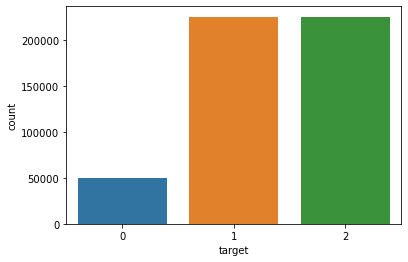

In [14]:
sns.countplot(x='target', data=train)

In [16]:
train.describe().head(20).T

,count,mean,std,min,25%,50%,75%,max
MI_dir_L5_weight,499548.0,78.635198,69.648347,1.000000,1.0,95.624337,143.093267,340.683810
MI_dir_L5_mean,499548.0,156.646779,147.788563,60.000000,60.0,74.013489,241.341089,886.166851
MI_dir_L5_variance,499548.0,13909.701162,22975.516924,0.000000,0.0,0.796154,26509.493833,173888.566142
MI_dir_L3_weight,499548.0,124.887893,111.218102,1.000000,1.0,146.585484,227.363376,469.492144
MI_dir_L3_mean,499548.0,157.173491,142.759982,60.000000,60.0,74.026082,287.516478,846.320306
...,...,...,...,...,...,...,...,...
HpHp_L0.01_magnitude,499548.0,163.672262,189.940273,60.000000,60.0,74.000000,138.592929,1272.919109
HpHp_L0.01_radius,499548.0,55.930653,3947.463299,0.000000,0.0,0.000000,0.000000,479368.980762
HpHp_L0.01_covariance,499548.0,13.188573,1047.546733,-689.982287,0.0,0.000000,0.000000,136584.102023
HpHp_L0.01_pcc,499548.0,0.000348,0.016368,-0.541626,0.0,0.000000,0.000000,1.531981


In [12]:
train.corr()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
MI_dir_L5_weight,1.000000,0.371141,0.484728,0.989939,0.410703,0.483593,0.956367,0.455251,0.471038,0.907570,...,-0.000505,-0.003248,0.059389,0.319091,-0.011263,0.304178,-0.005136,-0.000909,-0.011320,0.605635
MI_dir_L5_mean,0.371141,1.000000,0.762433,0.418160,0.990994,0.834206,0.468931,0.956155,0.894940,0.545631,...,-0.006810,-0.007276,0.248496,0.787703,-0.009115,0.778974,-0.007954,-0.007123,-0.010027,0.556456
MI_dir_L5_variance,0.484728,0.762433,1.000000,0.488114,0.829660,0.986897,0.485718,0.900679,0.953678,0.540690,...,-0.007297,-0.008085,0.243830,0.610090,-0.010408,0.596688,-0.008359,-0.007591,-0.012615,0.593789
MI_dir_L3_weight,0.989939,0.418160,0.488114,1.000000,0.449869,0.494113,0.986219,0.484095,0.488795,0.939255,...,-0.000054,-0.002863,0.071506,0.359014,-0.010939,0.344447,-0.004641,-0.000431,-0.011004,0.598770
MI_dir_L3_mean,0.410703,0.990994,0.829660,0.449869,1.000000,0.890358,0.492507,0.985722,0.938988,0.568477,...,-0.007058,-0.007598,0.231492,0.759379,-0.009674,0.750025,-0.008224,-0.007370,-0.010448,0.579743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HpHp_L0.01_magnitude,0.304178,0.778974,0.596688,0.344447,0.750025,0.666200,0.371578,0.729427,0.708750,0.420923,...,0.064926,0.056766,0.353040,0.994952,0.065391,1.000000,0.073831,0.068675,0.057752,0.399217
HpHp_L0.01_radius,-0.005136,-0.007954,-0.008359,-0.004641,-0.008224,-0.008738,-0.003010,-0.008305,-0.008764,-0.002408,...,0.817908,0.693575,-0.002402,-0.000424,0.862108,0.073831,1.000000,0.862252,0.724332,-0.007993
HpHp_L0.01_covariance,-0.000909,-0.007123,-0.007591,-0.000431,-0.007370,-0.007915,0.000323,-0.007496,-0.007988,-0.000718,...,0.992752,0.855582,-0.002136,-0.000921,0.741048,0.068675,0.862252,1.000000,0.858559,-0.007083
HpHp_L0.01_pcc,-0.011320,-0.010027,-0.012615,-0.011004,-0.010448,-0.013183,-0.010528,-0.010715,-0.013373,-0.011772,...,0.862263,0.908188,-0.003620,-0.004594,0.685558,0.057752,0.724332,0.858559,1.000000,-0.027916


In [20]:
from sklearn.feature_selection import VarianceThreshold

def VarianceThreshold(data):
    print("Shape before Variance Threshold", data.shape)

    var_thresh = VarianceThreshold(0.1)
    var_thresh.fit(data)
    dropcols = [col for col in data.columns if col not in data.columns[var_thresh.get_support()]]

    for features in dropcols:
        print(features)

    #transformed_data = data.drop(dropcols, axis=1)
    # transformed data will have all columns with variance less than 0.1 removed
    #transformed_data = VarianceThreshold()
    #transformed_data.to_csv("../input/variance_thresh_train.csv", index=False)
    #print("Shape after Variance Threshold", transformed_data.shape)

VarianceThreshold(train)

Shape before Variance Threshold (499548, 116)


AttributeError: 'float' object has no attribute 'shape'

In [21]:
def CorrelationCoefficient(data):
    print("Shape before Correlation Coefficient", data.shape)
    # Creating correlation matrix
    cor_matrix = data.corr().abs()
    #print(); print(cor_matrix)

    # Selecting upper triangle of correlation matrix
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    print(); print(upper_tri)

    # Finding index of feature columns with correlation greater than 0.97
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.99)]
    print(); print(to_drop)

    # Droping Marked Features
    #df = data.drop(data[to_drop], axis=1)
    #print(); print(df.head())
    #df.to_csv("../input/correlation_drop_train.csv", index=False)
    #print("Shape after Correlation Coefficient", df.shape)

    #return df

CorrelationCoefficient(train)

Shape before Correlation Coefficient (499548, 116)

                       MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
MI_dir_L5_weight                    NaN        0.371141            0.484728   
MI_dir_L5_mean                      NaN             NaN            0.762433   
MI_dir_L5_variance                  NaN             NaN                 NaN   
MI_dir_L3_weight                    NaN             NaN                 NaN   
MI_dir_L3_mean                      NaN             NaN                 NaN   
...                                 ...             ...                 ...   
HpHp_L0.01_magnitude                NaN             NaN                 NaN   
HpHp_L0.01_radius                   NaN             NaN                 NaN   
HpHp_L0.01_covariance               NaN             NaN                 NaN   
HpHp_L0.01_pcc                      NaN             NaN                 NaN   
target                              NaN             NaN                 NaN   
